<a href="https://colab.research.google.com/github/RudkovYaroslav/project_gaming/blob/main/%D0%98%D0%B3%D1%80%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B8%D0%BD%D0%B4%D1%83%D1%81%D1%82%D1%80%D0%B8%D1%8F_1980_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект "Игровая индустрия 1980-2016"

# Введение

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Цель исследования:**
- Выявить определяющие успешность игры закономерности
- Проанализировать данные с целью проверки гипотез

**Ход исследования**

Я получу данные из DataFrame, который находится в csv файле. О качестве этого DataFrame пока ничего не известно, так что, скорее всего, понадобится провести предобработку.

Проверю данные на аномалии и выбросы, которые могут повлиять на исследование, заполню пропуски, если они имеются, и в целом поищу возможность исправить все ошибки, которые не приведут к искажению конечного результата.

Итоговое исследование пройдет в 7 этапов:
- 1. Обзор данных
- 2. Предобработка данных
- 3. Проведение исследовательского анализа с цеью более глубокой оценки важных параметров
- 4. Создание портрета пользователя разных регионов
- 5. Проверка гипотез
- 6. Общий вывод по исследованию

## Подготовка DataFrame

Импортируем нужные библиотеки и зададим некотороые стандартные параметры.

In [ ]:
import pandas as pd #Библиотека для обработки DataFrame
import seaborn as sns #Библиотека для постройки графиков
import datetime as dt #Библиотека для работы с датами
import matplotlib.pyplot as plt #Библиотека для задачи аттрибутов графиков
import re #Библиотека для возможности использования regex
plt.rcParams["figure.figsize"] = (15,5) #Сразу зададим размер для наших графиков
from scipy import stats as st # Библиотека для более простого построения распределений и поиска t-критерия
import numpy as np #Библиотека для использования математических функций
import warnings #Библиотека для того, чтобы убрать сообщения об "ошибках"
warnings.filterwarnings('ignore')

Считаем файл

In [ ]:
df = pd.read_csv('/datasets/games.csv')

Рассмотрим основную информацию о файле, а также взглянем, как он выглядит

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод по разделу 1

Импортировали нужные библиотеки, создали DataFrame из csv файла и рассмотрели базовую информацию о нем(DataFrame), также оценили "на глаз" реалистичность данных, пригодность их для будущего анализа. DataFrame весьма реалистичен.

## Предобработка данных

Для начала посмотрим, какой процент данных занимают пропуски:

In [ ]:
pd.DataFrame(round(df.isna().mean()*100)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
Critic_Score,51.000000
User_Score,40.000000
Rating,40.000000
Year_of_Release,2.000000
Name,0.000000
Platform,0.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем все названия столбцов к правильному виду:

In [ ]:
df.rename(columns=lambda x: x.lower(), inplace=True)

Теперь попробуем реализовать небольшой алгоритм, который сможет спасти небольшое количество данных в стобце year_of_release. В чем сама суть - у нас есть названия игр, в которых в конце стоит цифра - это, иногда, год издания-1. У нас таких, как видно ниже, 66. Теперь осталось только реализовать это в коде.

In [ ]:
df[(df['year_of_release'].isna()) & df['name'].str.match('.+\d')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M


Для проверки на соответствие нашему шаблону, будем использовать **regex**. **".+\d+"** означает - "Любое количество символов в начале, и любое количество цифр на конце".

In [ ]:
def saving_grace(row): #Функция проверяет, если название игры соответствует шаблону "Название год".Если да, то возвращает год
    if re.fullmatch('.+\d+', row['name']) and int(re.findall('\d+', row['name'])[0]) > 1900: #Обязательная проверка, точно ли
        row['year_of_release'] = int(re.findall('\d+', row['name'])[0])-1                    #число - год
    return row['year_of_release']

In [ ]:
df.loc[df['year_of_release'].isna(),'year_of_release'] = df[df['year_of_release'].isna()].apply(saving_grace, axis=1)

In [ ]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+


Проверим работоспособность

In [ ]:
df.iloc[183]

name               Madden NFL 2004
platform                       PS2
year_of_release             2003.0
genre                       Sports
na_sales                      4.26
eu_sales                      0.26
jp_sales                      0.01
other_sales                   0.71
critic_score                  94.0
user_score                     8.5
rating                           E
Name: 183, dtype: object

Мы избавились от некоторого количества пропусков, но не всех. На счет остальных мы можем лишь определить интервалы, в которых игры были выпущены на основе платформы(времени ее "жизни"), но для исследования это только повредит. Лучше убрать строки с пропусками, так как мы будем анализировать данные в срезах по годам. Эти строки нам все равно не пригодятся. Только осталось изменить тип данных

In [ ]:
df = df.dropna(subset=['year_of_release'])

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int64')

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заметили в столбце user_score значение tbd, что означает to be determined \[еще не определено\], что, для нашего случая, равносильно None

In [ ]:
df['user_score'] = df['user_score'].replace('tbd', None)

Также поставим правильный тип данных

In [ ]:
df['user_score'] = df['user_score'].astype('float64')

Теперь попробуем разобраться с пропусками в последних трех столбцах. Для начала посмотрим, есть ли зависимость между ними:

In [ ]:
df[(df['user_score'].isna()) & (~df['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997,Action,2.30,2.46,0.2,0.28,85.0,NaN,T
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,NaN,E10+
440,Need for Speed III: Hot Pursuit,PS,1998,Racing,2.14,0.86,0.0,0.13,88.0,NaN,E
637,Riven: The Sequel to Myst,PC,1997,Adventure,1.52,0.82,0.0,0.10,83.0,NaN,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.0,0.28,NaN,NaN,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.0,0.00,NaN,NaN,M
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.0,0.00,NaN,NaN,T
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.0,0.00,NaN,NaN,T
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,NaN,E


Видим, что зависимости нет. Количество, когда пропуски есть в обоих случаях куда меньше, чем общее количество пропусков.

In [ ]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8467
user_score         7840
rating             6683
dtype: int64

Самое логичное объяснение этим пропускам - этих игр нет в сервисах по оценке или они(игры) настолько непопулярны, что для них не дали оценку. Здесь мы, к сожалению, не можем придумать оценку из воздуха, а поставить 0 было бы недальновидно, так как в дальнейшем мы можем прибегать к какому-нибудь анализу по этим столбцам. Справедливо оставить None.

Только можем столбец Rating, так как он категориальный, заполнить значением - заглушкой

In [ ]:
df['rating'] = df['rating'].fillna('Unknown')

In [ ]:
df = df.dropna(subset=['name'])

Также уберем две строчки с игрой без имени, так как это, с большой вероятностью, ошибка

In [ ]:
df['all_sales'] = df.iloc[:,4:8].sum(axis=1)

Добавим столбец с общей выручкой каждой игры за все регионы

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


На последок проверим DataFrame на явные дубликаты:

In [ ]:
df.duplicated().sum()

0

Также проверим неявные дубликаты:

In [ ]:
df[['name', 'platform', 'year_of_release']].duplicated().sum()

1

In [ ]:
df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Это вся проверка на неявные дубликаты, так как если будем смотреть только по имени и году, то найдем много одинаковых игр, только на разных платформах.

In [ ]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

### Вывод по разделу 2

Провели общую предобработку DataFrame:

- 1. Привели все столбцы к правильному типу данных
- 2. Рассмотрели пропуски. Заполнили их логичными значениями там, где это можно было, в остальных же случаях, оставили их, так как невозможно найти зависимость в этих столбцах.
- 3. Создали дополнительный столбец, в котором будем хранить общую выручку по всем регионам.
- 4. Проверили DataFrame на явные дубликаты. Их не оказалось

## Исследовательский анализ

### Общие тренды по годам

Посмотрим на количество игр, а также их доходность в разрезе по годам:

In [ ]:
yearly_sales = df.groupby('year_of_release', as_index=False).agg(count=('name', 'count'), price=('all_sales', 'sum'))

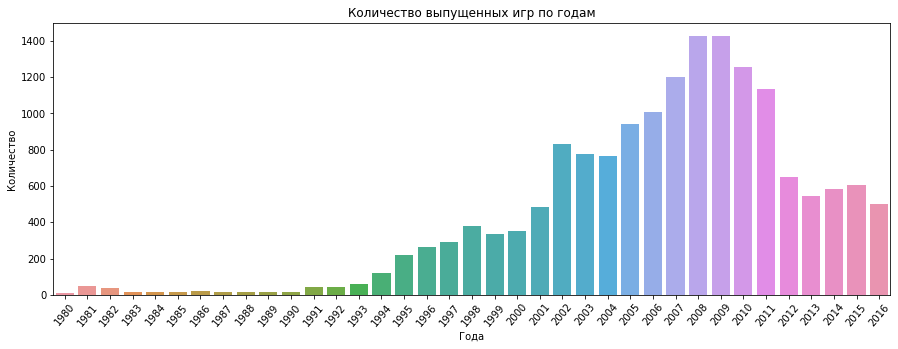

In [ ]:
sns.barplot(y=yearly_sales['count'], x=yearly_sales['year_of_release'])
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Года')
plt.ylabel('Количество')
plt.xticks(rotation=50)
plt.show()

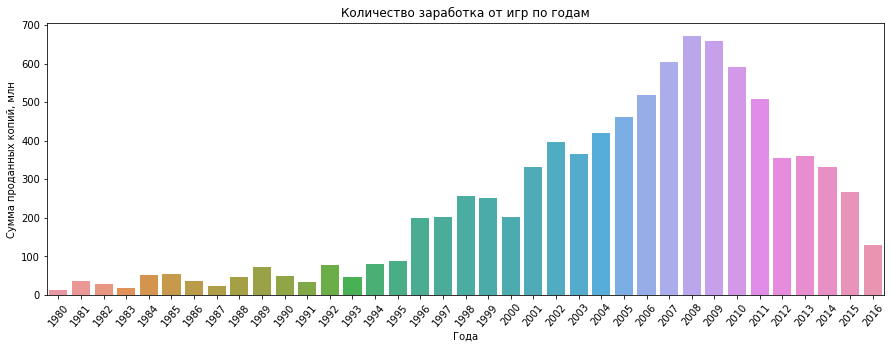

In [ ]:
sns.barplot(y=yearly_sales['price'], x=yearly_sales['year_of_release'])
plt.title('Количество заработка от игр по годам')
plt.xlabel('Года')
plt.ylabel('Сумма проданных копий, млн')
plt.xticks(rotation=50)
plt.show()

Видим, что 2008-2009 года можно считать "золотыми" не только по количеству тайтлов, но и по заработку на них. Для исследования возьмем "Актуальный" период в 2012-2016, так как стагнация, в которой мы сейчас находимся, заметна именно в этот период.

Также стоит отметить то, что график в какой-то степени похож на "Качели", то есть можно увидеть периоды стагнации, а затем взлета. Это можно объяснить тем, что крупные проекты выходят, поднимают продажи, а затем компании уходят делать новые. И вот пока делаются новые, происходит стагнация на рынке.

### Общие тренды по платформам

Теперь проверим теже самые параметры, но в разрезе по платформам.

In [ ]:
platform_sales = df.groupby('platform', as_index=False).agg(count=('name', 'count'), price=('all_sales', 'sum'))

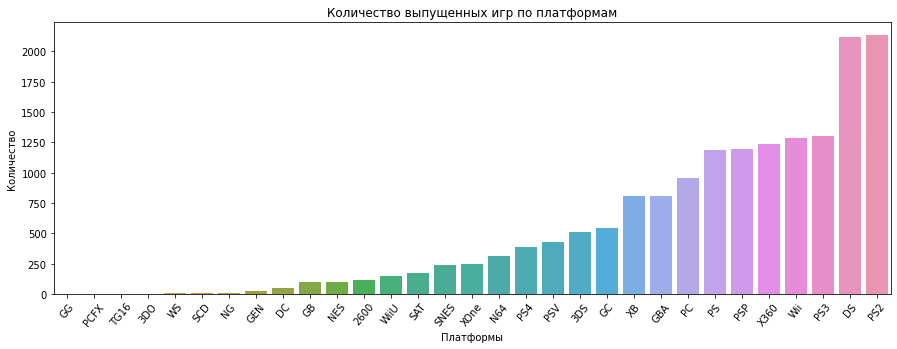

In [ ]:
sns.barplot(y=platform_sales['count'].sort_values(), x=platform_sales.sort_values(by='count')['platform'])
plt.title('Количество выпущенных игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество')
plt.xticks(rotation=50)
plt.show()

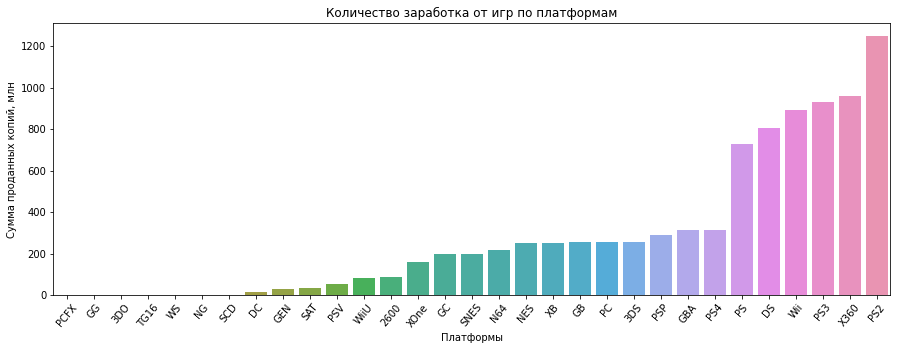

In [ ]:
sns.barplot(y=platform_sales['price'].sort_values(), x=platform_sales.sort_values(by='price')['platform'])
plt.title('Количество заработка от игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Сумма проданных копий, млн')
plt.xticks(rotation=50)
plt.show()

Будем ориентироваться на графки продаж по платформам. Посмотрим информацию по периоду жизни самых успешных платформ.

### Выделение "Периода жизни" самых успешных платформ за все время

In [ ]:
platform_sales = platform_sales[platform_sales['price'] > 700]

Выделим самые успешные платформы по графику(Они находятся в отметке >700 млн)

In [ ]:
best_platforms = df[df['platform'].isin(platform_sales.platform.unique())].groupby(['platform', 'year_of_release'], as_index=False).name.count()

In [ ]:
best_platforms

,platform,year_of_release,name
0,DS,1985,1
1,DS,2004,23
2,DS,2005,118
3,DS,2006,201
4,DS,2007,377
...,...,...,...
62,X360,2012,106
63,X360,2013,75
64,X360,2014,63
65,X360,2015,35


Видим странное значение в годе выпуска. Посмотрим подробнее:

In [ ]:
df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


Действительно, странная строка. Игра практически ничего не принесла по доходу, не имела оценок. Считаем это "Выбросом" и избавимся от него, так как он сильно исказит будущий график

In [ ]:
best_platforms = best_platforms.drop(best_platforms.index[0])

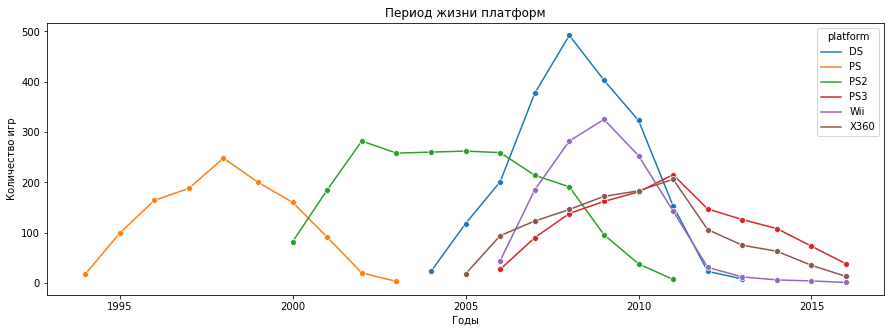

In [ ]:
sns.lineplot(data=best_platforms, x='year_of_release', y='name', hue='platform', marker='o')
plt.title('Период жизни платформ')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

In [ ]:
best_platforms.groupby('platform').year_of_release.agg(lambda x: x.max()-x.min())

platform
DS       9
PS       9
PS2     11
PS3     10
Wii     10
X360    11
Name: year_of_release, dtype: int64

Можно сделать вывод, что даже самые успешные платформы не "живут" больше 11 лет.

### Общие тренды на актуальное время

In [ ]:
recent_state = df[df['year_of_release'] >= 2012]

Будем в дальнейшем полагаться только на этот DataFrame. В нем содержится информация об "Актуальном" времени.

Теперь проверим все те же метрики(Количество выпущенных игр, а также их заработок) в разрезе по платформам, но уже за актуальное время:

In [ ]:
recent_platform_sales = recent_state.groupby('platform', as_index=False).agg(count=('name', 'count'), price=('all_sales', 'sum'))

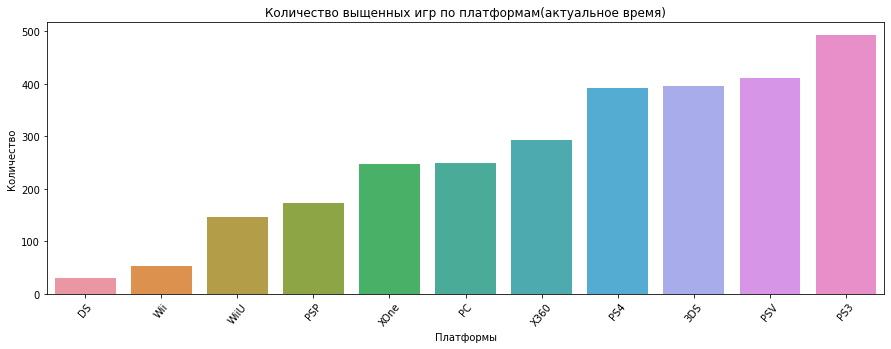

In [ ]:
sns.barplot(y=recent_platform_sales['count'].sort_values(), x=recent_platform_sales.sort_values(by='count')['platform'])
plt.title('Количество выщенных игр по платформам(актуальное время)')
plt.xlabel('Платформы')
plt.ylabel('Количество')
plt.xticks(rotation=50)
plt.show()

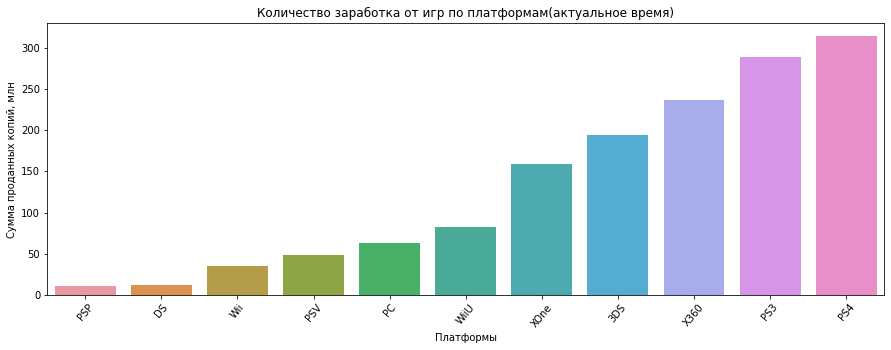

In [ ]:
sns.barplot(y=recent_platform_sales['price'].sort_values(), x=recent_platform_sales.sort_values(by='price')['platform'])
plt.title('Количество заработка от игр по платформам(актуальное время)')
plt.xlabel('Платформы')
plt.ylabel('Сумма проданных копий, млн')
plt.xticks(rotation=50)
plt.show()

### Анализ трендов по платформам за актуальное время

In [ ]:
recent_platforms = recent_state[recent_state['platform'].isin(recent_platform_sales.platform.unique())].groupby(['platform', 'year_of_release'], as_index=False).name.count()

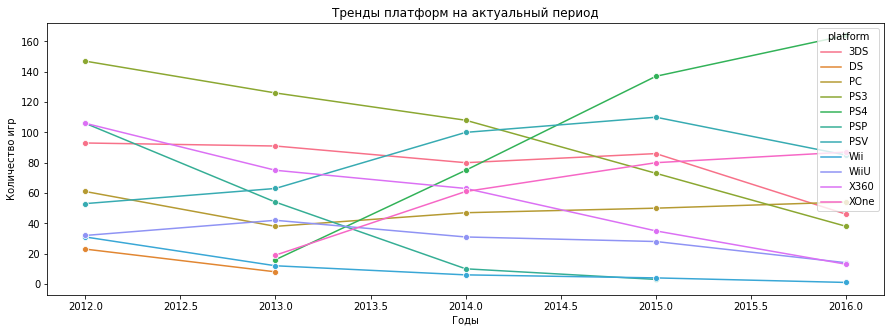

In [ ]:
sns.lineplot(data=recent_platforms, x='year_of_release', y='name', hue='platform', marker='o')
plt.title('Тренды платформ на актуальный период')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

Здесь можем посмотреть все тренды за последнее время. В графике можно легко запутаться, а большинство линий имеют тенденцию идти вниз, так что выделим только те, которые растут.

In [ ]:
def tend(column):
    return column.iloc[-1]-column.iloc[-2]

In [ ]:
recent_platforms = recent_platforms.join(recent_platforms.groupby('platform').agg(tendency = ('name',tend)), on='platform')

In [ ]:
recent_platforms = recent_platforms[recent_platforms['tendency'] > 0]

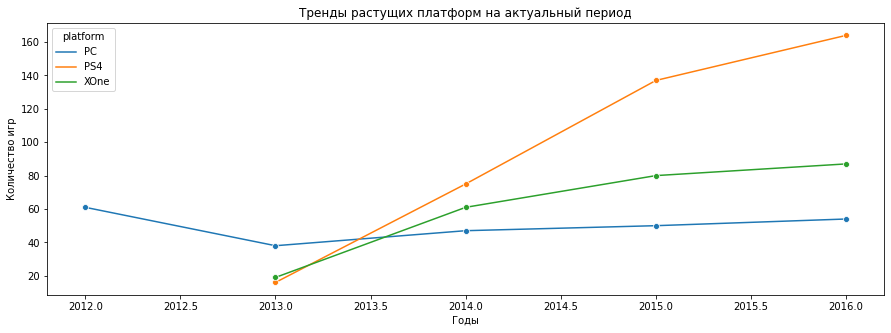

In [ ]:
sns.lineplot(data=recent_platforms, x='year_of_release', y='name', hue='platform', marker='o')
plt.title('Тренды растущих платформ на актуальный период')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

Как и стоило предполагать, на данный момент актуальные платформы - это ПК, XBOX One,  Playstation 4, где последний стремительно растет вверх.

### Анализ разброса продаж по платформам

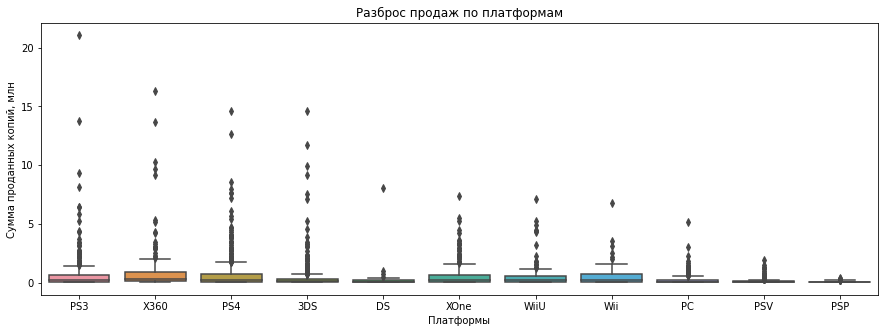

In [ ]:
sns.boxplot(y=recent_state['all_sales'], x=recent_state['platform'])
plt.title('Разброс продаж по платформам')
plt.xlabel('Платформы')
plt.ylabel('Сумма проданных копий, млн')
plt.show()

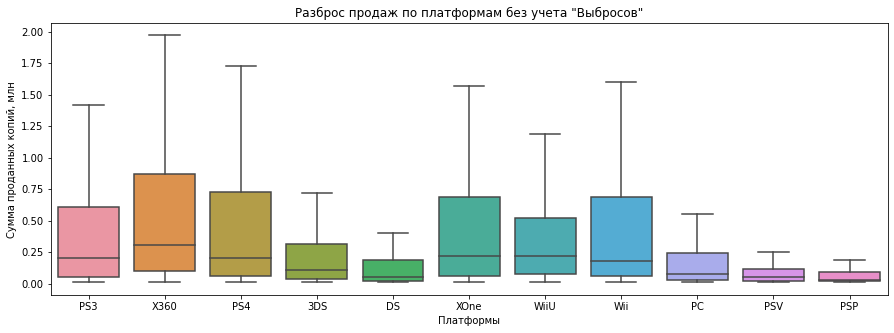

In [ ]:
sns.boxplot(y=recent_state['all_sales'], x=recent_state['platform'], showfliers=False)
plt.title('Разброс продаж по платформам без учета "Выбросов"')
plt.xlabel('Платформы')
plt.ylabel('Сумма проданных копий, млн')
plt.show()

Из данного графика можем увидеть, что основную долю прибыли(Как это и зачастую происходит в геймдеве) приносят единичные продукты, глобальные успехи, над которыми трудились не один год. Они на графике отображены точками сверху. Большинство же выпущенных тайтлов находится внизу и не приносит соразмерную прибыль. Поэтому нас в первую очередь интересуют "Выбросы" на этом графике.

Без учета игровых "Гигантов", общие продажи каждой конкретной игры даже у успешных консолей в среднем не выходят дальше 0.75 млн копий, а медиана находится на уровне 0.2-0.25 млн копий.

Также абсолютно справедливо то, что самые большие "Выбросы" приходятся на консоли прошлого поколения - PS3, XBOX 360; Так как эти продукты приходятся как раз на "Золотой период" и уже успели настояться на рынке. Но PS4 не сильно отстает, учитывая, что игры этой платформы сидят на рынке не так давно.

### Анализ влияния отзывов на доходность

#### Для одной платформы

Для такой большой области мы рассмотрим одну популярную консоль - уходящую легенду - PS3 и все игры за период ее жизни.

In [ ]:
ps3 = recent_state[recent_state['platform'] == 'PS3']

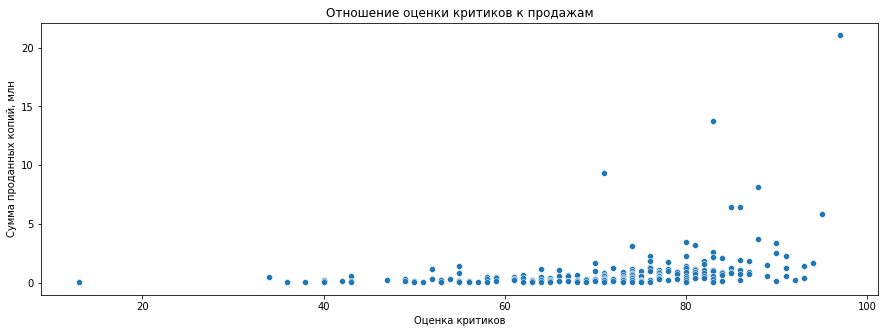

In [ ]:
sns.scatterplot(y=ps3['all_sales'], x=ps3['critic_score'])
plt.title('Отношение оценки критиков к продажам')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма проданных копий, млн')
plt.show()

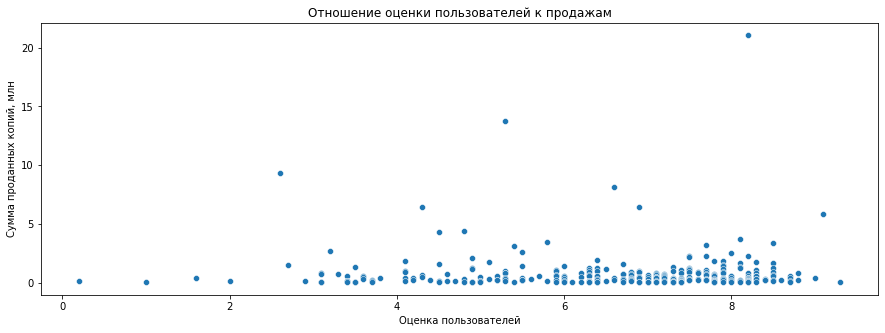

In [ ]:
sns.scatterplot(y=ps3['all_sales'], x=ps3['user_score'])
plt.title('Отношение оценки пользователей к продажам')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма проданных копий, млн')
plt.show()

In [ ]:
ps3[['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.544510,0.334152
user_score,0.544510,1.000000,-0.010011
all_sales,0.334152,-0.010011,1.000000


Платформа является финансово успешной и уже находится на закате своей жизни, так что анализ ее показателей будет репрезентатавиным. По графику и коэффициенту корреляции мы можем увидеть, что оценки критиков куда чаще сопутствуют успеху конкретного продукта(Корреляция в 0.43), что, в целом, логично, так как это работа людей - оценивать продукт.

Также иногда оценки пользователей(Корреляция 0.12) бывают очень обманчивыми - во времена review bombing'a, например.

Для формирования общего вывода нам нужно рассмотреть еще несколько кандидатов. Для объективности будем смотреть на XBOX 360, Nintendo 3DS, WiiU

In [ ]:
platforms = ['3DS', 'X360', 'WiiU']

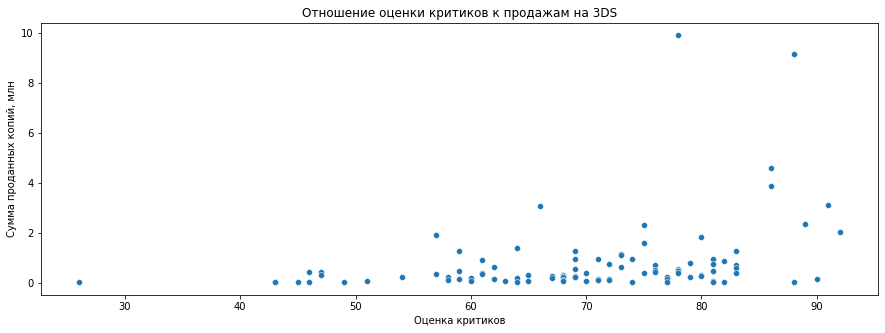

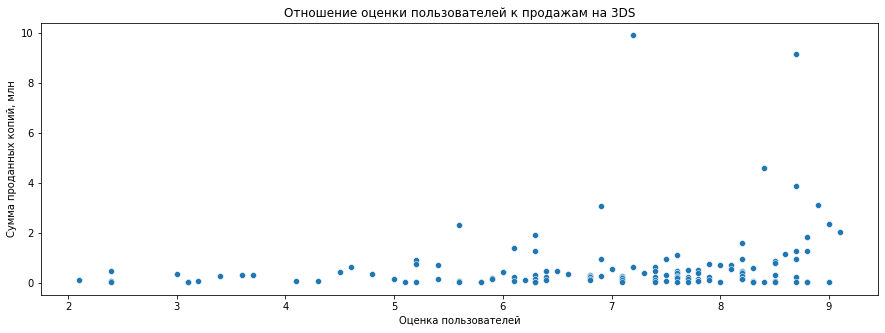

,critic_score,user_score,all_sales
critic_score,1.000000,0.723345,0.320803
user_score,0.723345,1.000000,0.200107
all_sales,0.320803,0.200107,1.000000


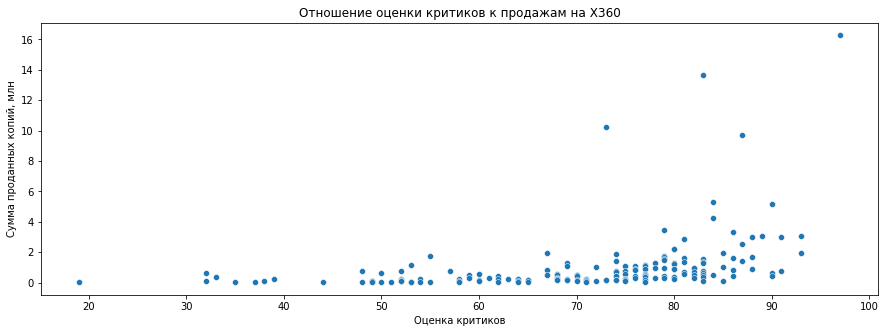

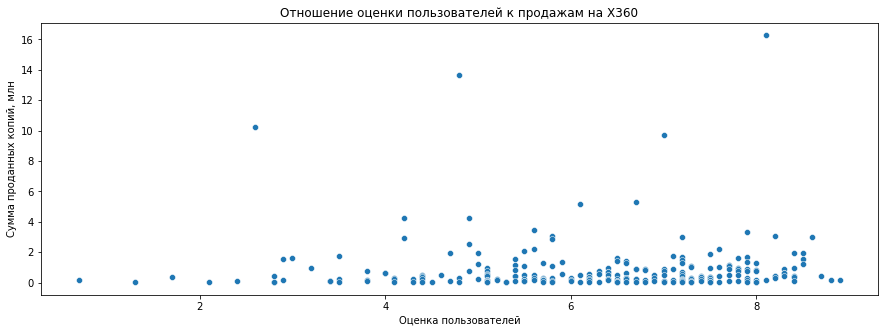

,critic_score,user_score,all_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.008411
all_sales,0.360573,0.008411,1.000000


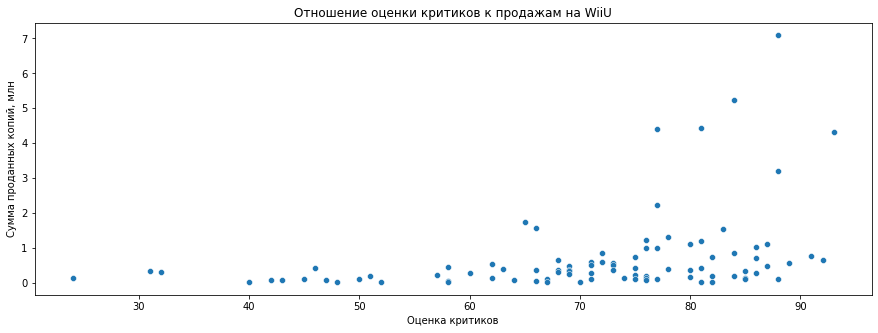

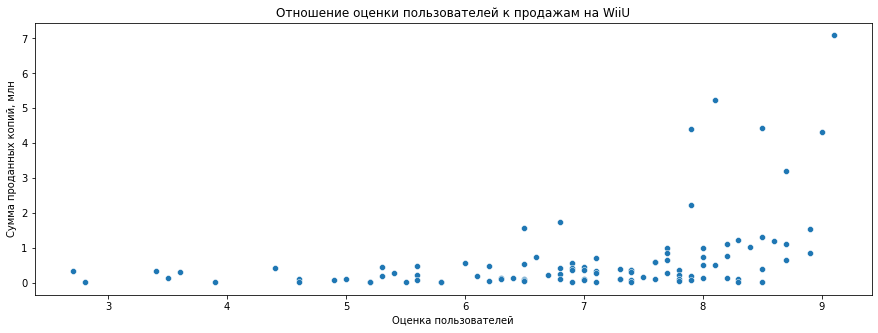

,critic_score,user_score,all_sales
critic_score,1.00000,0.77008,0.34838
user_score,0.77008,1.00000,0.39823
all_sales,0.34838,0.39823,1.00000


In [ ]:
for platform in platforms:
    score_df = recent_state[recent_state['platform'] == platform]
    sns.scatterplot(y=score_df['all_sales'], x=score_df['critic_score'])
    plt.title(f'Отношение оценки критиков к продажам на {platform}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Сумма проданных копий, млн')
    plt.show()
    sns.scatterplot(y=score_df['all_sales'], x=score_df['user_score'])
    plt.title(f'Отношение оценки пользователей к продажам на {platform}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Сумма проданных копий, млн')
    plt.show()
    display(score_df[['critic_score', 'user_score', 'all_sales']].corr())

#### Для всех актуальных платформ

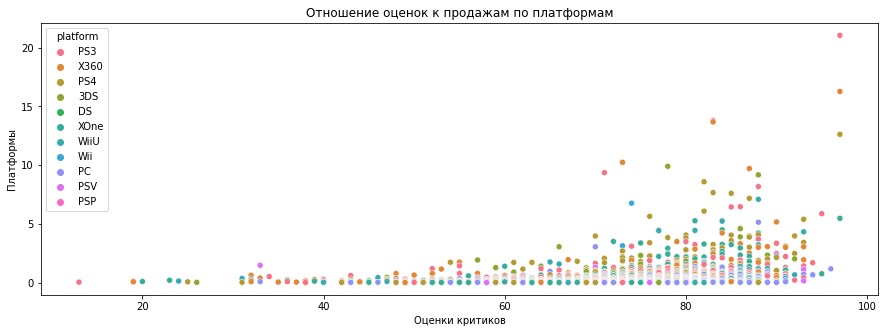

In [ ]:
sns.scatterplot(x=recent_state['critic_score'], y=recent_state['all_sales'], hue=recent_state['platform'])
plt.title('Отношение оценок к продажам по платформам')
plt.ylabel('Платформы')
plt.xlabel('Оценки критиков')
plt.show()

График вышел объемным и показывает не очень много. Попробуем подробнее рассмотреть:

In [ ]:
def pears_corr(row):
    return row.corr()['all_sales']

In [ ]:
sales_to_score = recent_state.groupby('platform').apply(pears_corr)[['critic_score', 'user_score']]
sales_to_score

all_sales,critic_score,user_score
platform,,
3DS,0.320803,0.200107
DS,NaN,0.589362
PC,0.237243,-0.124176
PS3,0.334152,-0.010011
PS4,0.406568,-0.027428
PSP,NaN,-0.805969
PSV,0.094488,0.004144
Wii,-0.424341,0.046222
WiiU,0.348380,0.398230


Изобразим в виде heatmap:

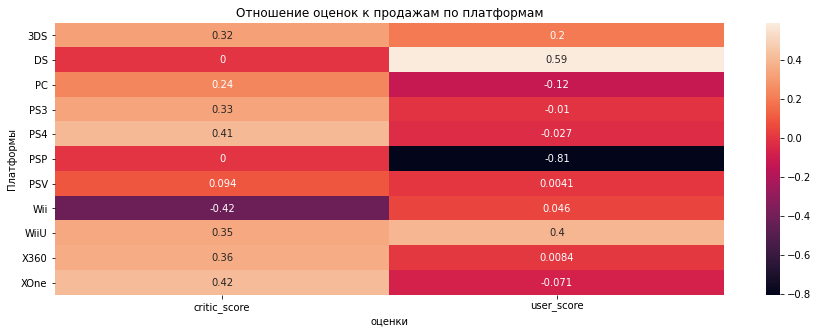

In [ ]:
sns.heatmap(sales_to_score.fillna(0), annot=True)
plt.title('Отношение оценок к продажам по платформам')
plt.ylabel('Платформы')
plt.xlabel('оценки')
plt.show()

In [ ]:
sales_to_score.mean()

all_sales
critic_score    0.232763
user_score      0.018944
dtype: float64

По итогу почти нигде не видим зависимости большой. Забавно, что для платформы PSP высокие оценки пользователей очень часто означали то, что продукт на самом деле провалится

In [ ]:
df[df['platform'] == 'PSP']['user_score'].isna().sum()

729

Хотя, возможно, это из-за того, что мало продуктов с оценками находится у нас. Все же на времена "Жизни" платформы, сервисы оценок не пользовались популярностью

По итогу можем заметить некоторую закономерность между оценками критиков и успешностью продукта, но она лишь небольшая.

### Анализ прибыльности по жанру игр

In [ ]:
genre_cost = recent_state.groupby('genre', as_index=False).all_sales.mean().sort_values(by='all_sales')

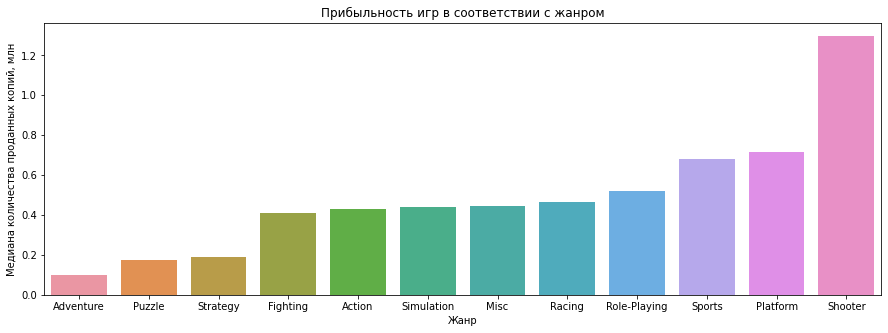

In [ ]:
sns.barplot(x=genre_cost['genre'], y=genre_cost['all_sales'], ci=None)
plt.title('Прибыльность игр в соответствии с жанром')
plt.xlabel('Жанр')
plt.ylabel('Медиана количества проданных копий, млн')
plt.show()

Видим на графике очень сильную доминацию жанра Shooter. В ТОП-3 вошли также "Платформеры" и "Спортивные". Это, в целом, логично по некоторым параметрам:
- 1. Игры этих жанров рассчитаны на самую широкую аудиторию. Нет никаких входных порогов
- 2. Затраты на разработку, зачастую, сильно компенсируются обширной фанбазой
- 3. За созданием игр в этом жанре очень чатсо стоят серьезные компании, которые вкладывают и получают серьезные суммы

__Теперь немного проясним ситуацию с role-playing:__

In [ ]:
recent_state[recent_state['genre'] == 'Role-Playing'].sort_values(by='all_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,Unknown,8.06
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,Unknown,7.14


Мы не можем с чистой совестью поместить этот жанр в топ-3, так как сумма не сильно отличается от "Спортивных", но, по факту, всю область занимает один продукт - Pokemon. Поэтому работать в этом жанре было бы недальновидно, так как конкурент очень серьезный.

В то же время в ТОП-3 самых малодоходных жанров вошли: "Приключения", "Головоломки", "Стратегии" и вот по каким причинам:
- 1. В первую очередь это все однопользовательские игры, что уже отбрасывает некоторое количество аудитории, которая очень любит платить.
- 2. У 2 из 3 жанров высокий порог вхождения. Головоломки и стратегии только для любителей подумать.
- 3. Крупные компании очень редко обращают внимание на проекты в таких жанрах. Обычно ими заняты Инди-разработчики. Отсюда меньшее вложение средств и меньшее получение.

### Вывод по разделу 3

Проверили большой исследовательский анализ данных:

- 1. Актуальным периодом для анализа выбрали 2012-2016, так как он задает тренд на настоящее время.
- 2. Определили "период жизни" для плафтормы, не считая ПК. Он составил в среднем 11 лет. Соответственно, очень неприбыльно вкладываться в проекты по платформе, которая находится на данном году жизни.
- 3. Проанализировали, в какие платформы выгоднее всего вкладываться в актуальное время. Ими оказались - PS4, XBOX One, PC.
- 4. Рассмотрели, как игры приносят доход компаниям на фоне графика boxplot. Большниство прибыли стоит за единичными проектами, над которыми трудятся большое количество времени, когда среднее значение по прибыли находится достаточно низко - на уровне малобюджетных проектов, не рассчитывающих на большую аудиторию.
- 5. Сравнили влияние отзывов на доходность. По итогу можем с небольшой долей вероятности(~23%) утвердить, что имея высокие оценки критиков, продукт скорее будет успешным, чем нет. Про оценки пользователей даже такого сказать не можем. Зависимости нет.
- 6. Проанализировали самые популярные на данный момент жанры во всех регионах. Ими оказались Shooter, Platform, Sports.

## Портрет пользователей регионов

In [ ]:
na_player = recent_state.groupby('platform', as_index=False).na_sales.sum().sort_values(by='na_sales')

In [ ]:
na_player = na_player.append({'platform': 'other', 'na_sales': na_player['na_sales'].head(-5).sum()}, ignore_index=True)

In [ ]:
eu_player = recent_state.groupby('platform', as_index=False).eu_sales.sum().sort_values(by='eu_sales')

In [ ]:
eu_player = eu_player.append({'platform': 'other', 'eu_sales': eu_player['eu_sales'].head(-5).sum()}, ignore_index=True)

In [ ]:
jp_player = recent_state.groupby('platform', as_index=False).jp_sales.sum().sort_values(by='jp_sales')

In [ ]:
jp_player = jp_player.append({'platform': 'other', 'jp_sales': jp_player['jp_sales'].head(-5).sum()}, ignore_index=True)

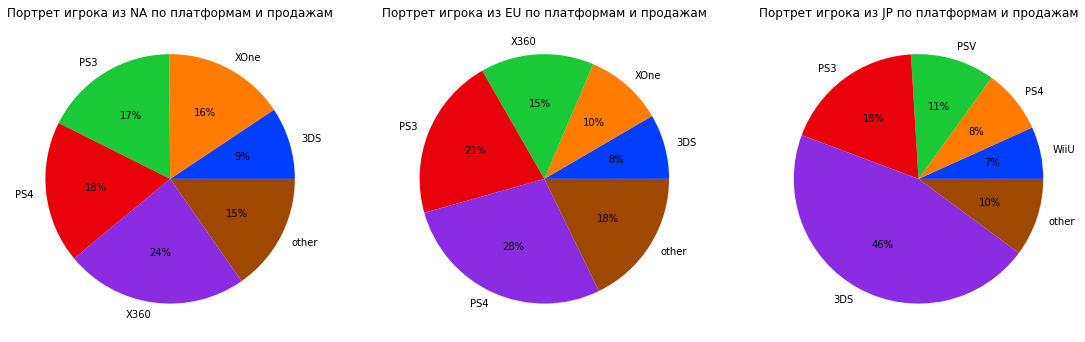

In [ ]:
colors = sns.color_palette('bright')[0:6]
fig, axs = plt.subplots(1, 3, figsize=(19, 7))
axs[0].pie(na_player['na_sales'].tail(6), labels = na_player['platform'].tail(6), colors = colors, autopct='%.0f%%')
axs[0].set_title("Портрет игрока из NA по платформам и продажам")
axs[1].pie(eu_player['eu_sales'].tail(6), labels = eu_player['platform'].tail(6), colors = colors, autopct='%.0f%%')
axs[1].set_title("Портрет игрока из EU по платформам и продажам")
axs[2].pie(jp_player['jp_sales'].tail(6), labels = jp_player['platform'].tail(6), colors = colors, autopct='%.0f%%')
axs[2].set_title("Портрет игрока из JP по платформам и продажам")
plt.show()

По итогу в регионах NA и EU видим практически полную доминацию платформ XBOX и PlayStation.

Не можем сказать также про регион JP. Там платформа XBOX не является популярной, зато его прямой конкурент - PlayStation, хорошо закрепился в регионе. Также только в этом регионе можно увидеть в топе популярных WiiU.

Если рядовой игрок в регионах Америки и Европы пользуется примерно одинаковыми платформами, то вот ситуация на востоке очень сильно различается. Все дело в доступности и ориентированности. PlayStation, а также XBOX, направлены как раз на Америку/Европу. Они там легко доступны и зачастую продвигаются в медиа. В тоже время такие же вещи можно сказать про Nintendo и WiiU в Японии. Там они очень развиты, отсюда такая разница большая.

In [ ]:
recent_state[['na_sales', 'jp_sales', 'eu_sales']].corr()

,na_sales,jp_sales,eu_sales
na_sales,1.000000,0.270985,0.767474
jp_sales,0.270985,1.000000,0.265111
eu_sales,0.767474,0.265111,1.000000


Даже если поискать корреляцию, то можно увидеть, что если игра успешна в Европе, то с действительно большим шансом(~Целых 77%) она будет успешна и в Америке и наоборот.

In [ ]:
na_player = recent_state.groupby('genre', as_index=False).na_sales.sum().sort_values(by='na_sales')

In [ ]:
na_player = na_player.append({'genre': 'other', 'na_sales': na_player['na_sales'].head(-5).sum()}, ignore_index=True)

In [ ]:
eu_player = recent_state.groupby('genre', as_index=False).eu_sales.sum().sort_values(by='eu_sales')

In [ ]:
eu_player = eu_player.append({'genre': 'other', 'eu_sales': eu_player['eu_sales'].head(-5).sum()}, ignore_index=True)

In [ ]:
jp_player = recent_state.groupby('genre', as_index=False).jp_sales.sum().sort_values(by='jp_sales')

In [ ]:
jp_player = jp_player.append({'genre': 'other', 'jp_sales': jp_player['jp_sales'].head(-5).sum()}, ignore_index=True)

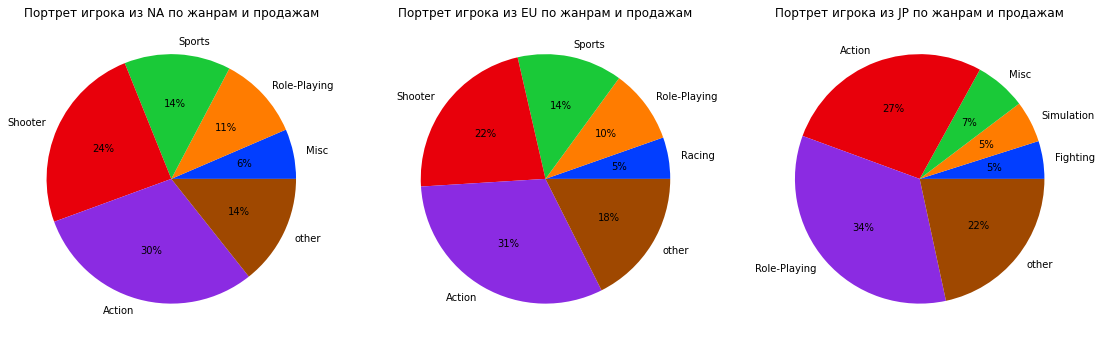

In [ ]:
colors = sns.color_palette('bright')[0:6]
fig, axs = plt.subplots(1, 3, figsize=(19, 7))
axs[0].pie(na_player['na_sales'].tail(6), labels = na_player['genre'].tail(6), colors = colors, autopct='%.0f%%')
axs[0].set_title("Портрет игрока из NA по жанрам и продажам")
axs[1].pie(eu_player['eu_sales'].tail(6), labels = eu_player['genre'].tail(6), colors = colors, autopct='%.0f%%')
axs[1].set_title("Портрет игрока из EU по жанрам и продажам")
axs[2].pie(jp_player['jp_sales'].tail(6), labels = jp_player['genre'].tail(6), colors = colors, autopct='%.0f%%')
axs[2].set_title("Портрет игрока из JP по жанрам и продажам")
plt.show()

Опять же картина игрока из Европы или Америки очень похожа, когда в Японии все совсем по-другому. Причина в том, что в Японии компании настолько доминируют, что можно просто отсортировать по общей стоимости и увидеть в лидерах Pokemon(Role-Playing) и Legend of Zelda(Action), которые и занимают практически ВЕСЬ рынок Японии. В рынок этой страны очень тяжело войти из-за нездоровой конкуренции против этих монополистов.

### Влияние рейтинга ESRB на продажи

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр. В нашем DataFrame рейтинг расположен в столбце rating. Посмотрим, как продаются игры различных рейтингов в разных регионах. Также напомним, что они означают:

- **«E» («Everyone») — «Для всех»**: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

- **«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»**: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.

- **«T» («Teen») — «Подросткам»**: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики

- **«M» («Mature») — «Для взрослых»**: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

In [ ]:
na_player = recent_state.groupby('rating', as_index=False).na_sales.sum().sort_values(by='na_sales')

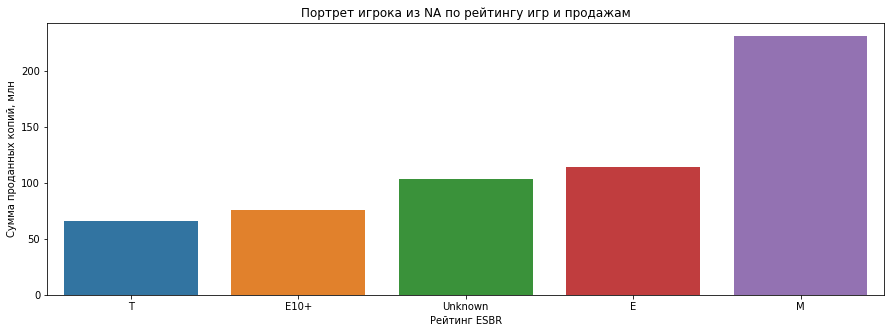

In [ ]:
sns.barplot(y=na_player['na_sales'], x=na_player['rating'], ci=False)
plt.title("Портрет игрока из NA по рейтингу игр и продажам")
plt.xlabel('Рейтинг ESBR')
plt.ylabel('Сумма проданных копий, млн')
plt.show()

In [ ]:
eu_player = recent_state.groupby('rating', as_index=False).eu_sales.sum().sort_values(by='eu_sales')

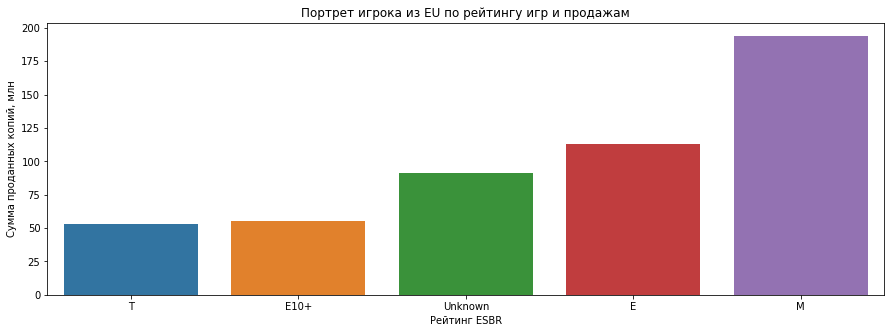

In [ ]:
sns.barplot(y=eu_player['eu_sales'], x=eu_player['rating'], ci=False)
plt.title("Портрет игрока из EU по рейтингу игр и продажам")
plt.xlabel('Рейтинг ESBR')
plt.ylabel('Сумма проданных копий, млн')
plt.show()

In [ ]:
jp_player = recent_state.groupby('rating', as_index=False).jp_sales.sum().sort_values(by='jp_sales')

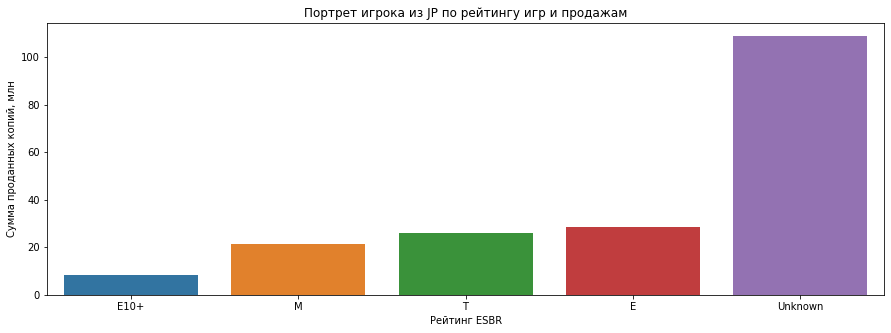

In [ ]:
sns.barplot(y=jp_player['jp_sales'], x=jp_player['rating'], ci=False)
plt.title("Портрет игрока из JP по рейтингу игр и продажам")
plt.xlabel('Рейтинг ESBR')
plt.ylabel('Сумма проданных копий, млн')
plt.show()

Опять же видим существенное значение между западом и востоком. И опять же дело в традициях - среднестатистический игрок Америки/Европы "взрослеет" куда быстрее, чем игрок из Японии. В основном из-за того, что это уже наработанное замкнутое колесо - разработчики делают больше игр рейтинга "M", дети в них играют, потому что больше не во что, разработчики делают еще больше игр.

В Японии дела обстоят по-другому. Там изначально крупнейшие франшизы позиционировались для детей, а теперь дети выросли, но все равно любят такую стилистику. Да и в целом государстов более ценит "Семейные традиции", поэтому за детьми серьезнее следят и не дадут поиграть в игры для взрослых.

Ну и также стоит отметить, что наибольше количество игр, которые не имеют рейтинга, хорошо продаются в Японии. Это может говорить о том, что в Японии есть либо свои сервисы по оценкам игр, либо там ими вообще не пользуются.

### Вывод по разделу 4

Составили портрет игроков из разных регионов, по которому можем сказать:

- 1. Тенденции востока и запада очень сильно различаются. Это можно списать на историю, геолокацию, традиции, культуру, насыщенность или монополизированность рынка, и еще много факторов. Факт остается фактом.
- 2. Для оценивания успешности продукта надо четко разделять эти регионы, так как маленький шанс на то, что он понравится всем.

## Проверка гипотез

### Гипотеза №1

$H_{0}$ = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

$H_{1}$ = Средние пользовательские рейтинги платформ Xbox One и PC разные

In [ ]:
xbox_user_score = recent_state[recent_state['platform'] == 'XOne']['user_score'].dropna()

In [ ]:
pc_user_score = recent_state[recent_state['platform'] == 'PC']['user_score'].dropna()

In [ ]:
result = st.ttest_ind(xbox_user_score, pc_user_score, alternative='two-sided')
result.pvalue

0.5747220188229722

При выбранной статистической значимости aplha = 0.05, pvalue больше него. Мы не можем отвергнуть нулевую гипотезу, поэтому с большой долей вероятности средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.

### Гипотеза №2


$H_{0}$ = Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

$H_{1}$ = Средние пользовательские рейтинги жанров Action и Sports разные.

In [ ]:
action_user_score = recent_state[recent_state['genre'] == 'Action']['user_score'].dropna()

In [ ]:
sports_user_score = recent_state[recent_state['genre'] == 'Sports']['user_score'].dropna()

In [ ]:
result = st.ttest_ind(action_user_score, sports_user_score, alternative='two-sided')
result.pvalue

1.4811496219719677e-23

Получили pvalue, которое куда меньше статистической значимости alpha = 0.05, есть основания отвергуть нулевую гипотезу. Можем сделать вывод о том, что с определенной долей вероятности, можем сказать, что средние пользовательские рейтинги этих двух жанров не равны друг другу.

Гипотезы сформировали на основе принятых правил, где нулевая гипотеза всегда рассматривает равенство средних значений выборок, а альтернативная предусматривает, какой будет другой вариант - больше, меньше, или не равно.

Для проверки обеих гипотех использовали метод ttest_ind, который ищет t-критерий Стьюдента, затем мы его преобразовываем в pvalue, который фактически означает нашу "уверенность" в том, что нулевая гипотеза имеет право на существование. Конкретно ttest_ind применяется для двух независимых выборок с, возможным, разным количеством значений и, возможно, разной дисперсией.

## Общий вывод

- __1. Подготовка DataFrame__ - Импортировали нужные библиотеки, создали DataFrame из csv файла и рассмотрели базовую информацию о нем(DataFrame), также оценили "на глаз" реалистичность данных, пригодность их для будущего анализа. DataFrame весьма реалистичен.
- __2. Предобработка данных__:
    - __2.1__ Привели все столбцы к правильному типу данных
    - __2.2__ Рассмотрели пропуски. Заполнили их логичными значениями там, где это можно было, в остальных же случаях, оставили их, так как невозможно найти зависимость в этих столбцах.
    - __2.3__ Создали дополнительный столбец, в котором будем хранить общую выручку по всем регионам.
    - __2.4__ Проверили DataFrame на явные дубликаты. Их не оказалось
- __3.Исследовательский анализ__:
    - __3.1__ Общие тренды по годам - 2008-2009 года можно считать "золотыми" не только по количеству тайтлов, но и по заработку на них. "Актуальным" периодом приняли 2012-2016.
    - __3.2__ Общие тренды по платформам - заметили, что самые успешыне платформы - это те, которые сейчас уходят с рынка(PS3, XBOX 360, Nintendo DS)
    - __3.3__ Выделение "Периода жизни" самых успешных платформ за все время - установили средний "Период жизни" на отметке в 11 лет.
    - __3.4__ Общие тренды на актуальное время - установили актуальное время, а также посмотрели на общие тенденции, которые развиты сейчас, а именно - доминация совперемнных платформ(PS4, PS3, Nintendo 3DS)
    - __3.5__ Анализ трендов по платформам за актуальное время - подтвердили, что единственные, успешные на данный момент платформы - это PS4, XBOX One, PC
    - __3.6__ Анализ разброса продаж по платформам - Рассмотрели, как игры приносят доход компаниям на фоне графика boxplot. Большниство прибыли стоит за единичными проектами, над которыми трудятся большое количество времени, когда среднее значение по прибыли находится достаточно низко - на уровне малобюджетных проектов, не рассчитывающих на большую аудиторию.
    - __3.7__ Анализ влияния отзывов на доходность - При высокой оценке критиков примерно в 23% случаях это означает, что продукт успешен. При высокой оценке пользователей такая вероятность только ~2%
    - __3.8__ Анализ прибыльности по жанру игр - Нашли самые прибыльные жанры за актуальное время - ими оказались Shooter, Action, Sports.
- __4. Портрет пользователей регионов__ - Составили портрет игроков из разных регионов, по которому можем сказать, что для оценивания успешности продукта надо четко разделять регионы Америки/Европы и Японии, так как маленький шанс на то, что продукт понравится всем. Также установили зависимость, что если продукт успешен в Европе, то примерно с вероятностью в 77%, он будет успешен и в Америке.
- __5. Проверка гипотез__ :
- __5.1__ Гипотеза №1:
    
Вопрос -  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
    
Ответ - C большой долей вероятности средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.
- __5.2__ Гипотеза №2:
    
Вопрос - Средние пользовательские рейтинги жанров Action и Sports разные?
    
Ответ - Можем сделать вывод о том, что с определенной долей вероятности, можем сказать, что средние пользовательские рейтинги этих двух жанров не равны друг другу.
- __6. Общие выводы и рекомендации по итогу анализа__:
    - 6.1 Лучше взаимодействовать с западной аудиторией, так как она более обширна и доступна.
    - 6.2 Однозначно популярными будут продукты на платформах PS4, XBOX One, PC. Стоит делать ставку на них.
    - 6.3 Внутри этих платформ стоит обратить внимание на игры жанра Action, Shooter, Sports, с возможным рейтингом "M", или "E".
    - 6.4 Если продукт уже вышел, или скоро выйдет, то нужно обратить внимание на оценки критиков. Высокая оценка может послужить фактором успешности.
    - 6.5 Если браться за рекламу - то лучше изначально нацелиться на крупные проекты от известных компаний, так как за ними стоит обширная доля фанбазы и средств.
    - 6.6 График успешности по годам по большей части представляет собой качели. "Золотое время" игр прошло уже почти 4 года назад. Сейчас крупные компании работают над новыми проектами, и как раз в этом или следующем году уже выставят их на показ. Возможен новый "Золотой" период в ближайшее время.